In [1]:
using PyCall
using Plots
using StatsPlots
using DataFrames
using Colors, ColorSchemes
using Statistics

In [2]:
const np = pyimport("numpy")
const os = pyimport("os")

PyObject <module 'os' from '/home/python/anaconda3-2020.11/lib/python3.8/os.py'>

In [3]:
caffe_with_norm = np.load("/home/shunosuga/data/sotsuron/pat_corr_res/with_norm/withnorm_caffe.npy")
unet_with_norm = np.load("/home/shunosuga/data/sotsuron/pat_corr_res/with_norm/withnorm_unet.npy")

caffe_without_norm = np.load("/home/shunosuga/data/sotsuron/pat_corr_res/without_norm/withoutnorm_caffe.npy")
unet_without_norm = np.load("/home/shunosuga/data/sotsuron/pat_corr_res/without_norm/withoutnorm_unet.npy")

3×8×50 Array{Float64,3}:
[:, :, 1] =
 0.664951  0.50212   0.866225  0.876562  …  0.984768  0.837895  0.724228
 0.665681  0.483774  0.859875  0.876771     0.993774  0.841788  0.923383
 0.675772  0.49425   0.864133  0.881224     0.990404  0.846635  0.922852

[:, :, 2] =
 0.83886   0.666117  0.919978  0.884201  …  0.932252  0.722058  0.349251
 0.847993  0.666535  0.922717  0.902453     0.971378  0.904268  0.768156
 0.837035  0.664422  0.920368  0.883022     0.932404  0.715058  0.363566

[:, :, 3] =
 0.6701    0.462177  0.90366   0.914622  …  0.987078  0.903986  0.96627
 0.644793  0.361393  0.887642  0.873373     0.965191  0.779464  0.765026
 0.640587  0.399858  0.891203  0.880808     0.971363  0.852609  0.847689

...

[:, :, 48] =
 0.700859  0.516398  0.883135  0.844294  …  0.967309  0.788133  0.885704
 0.680014  0.493506  0.885713  0.844956     0.976704  0.830366  0.961508
 0.67816   0.482204  0.877173  0.829966     0.942961  0.752153  0.811706

[:, :, 49] =
 0.787345  0.54809   0.834979

In [4]:
caffe_with_norm_mean = reshape(mean(caffe_with_norm, dims=1), 8, 50)
unet_with_norm_mean = reshape(mean(unet_with_norm, dims=1), 8, 50)

caffe_without_norm_mean = reshape(mean(caffe_without_norm, dims=1), 8, 50)
unet_without_norm_mean = reshape(mean(unet_without_norm, dims=1), 8, 50)

8×50 Array{Float64,2}:
 0.668801  0.841296  0.651827  0.768432  …  0.686344  0.789016  0.817661
 0.493381  0.665692  0.407809  0.583163     0.497369  0.545537  0.624544
 0.863411  0.921021  0.894168  0.88484      0.882007  0.832467  0.872784
 0.878186  0.889892  0.889601  0.916125     0.839739  0.794691  0.801996
 0.894722  0.882518  0.891419  0.886914     0.846783  0.735761  0.615502
 0.989649  0.945345  0.974544  0.965139  …  0.962325  0.942777  0.537024
 0.842106  0.780462  0.845353  0.854825     0.790217  0.849918  0.633291
 0.856821  0.493658  0.859662  0.939988     0.886306  0.84957   0.933239

In [5]:
data_caffe_with_subject1 = [
    vec(caffe_with_norm[1, 1, :]) ["conv1" for n = 1 : 50];
    vec(caffe_with_norm[1, 2, :]) ["conv2" for n = 1 : 50];
    vec(caffe_with_norm[1, 3, :]) ["conv3" for n = 1 : 50];
    vec(caffe_with_norm[1, 4, :]) ["conv4" for n = 1 : 50];
    vec(caffe_with_norm[1, 5, :]) ["conv5" for n = 1 : 50];
    vec(caffe_with_norm[1, 6, :]) ["fc6" for n = 1 : 50];
    vec(caffe_with_norm[1, 7, :]) ["fc7" for n = 1 : 50];
    vec(caffe_with_norm[1, 8, :]) ["fc8" for n = 1 : 50]
]

data_unet_with_subject1 = [
    vec(unet_with_norm[1, 1, :]) ["conv1" for n = 1 : 50];
    vec(unet_with_norm[1, 2, :]) ["conv2" for n = 1 : 50];
    vec(unet_with_norm[1, 3, :]) ["conv3" for n = 1 : 50];
    vec(unet_with_norm[1, 4, :]) ["conv4" for n = 1 : 50];
    vec(unet_with_norm[1, 5, :]) ["conv5" for n = 1 : 50];
    vec(unet_with_norm[1, 6, :]) ["fc6" for n = 1 : 50];
    vec(unet_with_norm[1, 7, :]) ["fc7" for n = 1 : 50];
    vec(unet_with_norm[1, 8, :]) ["fc8" for n = 1 : 50];
]



400×2 Array{Any,2}:
  0.552601    "conv1"
  0.0930765   "conv1"
  0.445716    "conv1"
  0.30394     "conv1"
  0.483492    "conv1"
  0.00834478  "conv1"
  0.325927    "conv1"
  0.127903    "conv1"
  0.259284    "conv1"
  0.319658    "conv1"
  0.501688    "conv1"
  0.374266    "conv1"
  0.259419    "conv1"
  ⋮           
  0.916069    "fc8"
 -0.973608    "fc8"
  0.973403    "fc8"
 -0.979707    "fc8"
 -0.950698    "fc8"
  0.986075    "fc8"
  0.53041     "fc8"
 -0.904325    "fc8"
  0.99032     "fc8"
  0.887023    "fc8"
  0.975988    "fc8"
  0.983494    "fc8"

In [6]:
df_caffe_with_sub1 = DataFrame(data_caffe_with_subject1, [:x, :layer])
df_unet_with_sub1 = DataFrame(data_unet_with_subject1, [:x, :layer])

,x,layer
,Any,Any
1,0.552601,conv1
2,0.0930765,conv1
3,0.445716,conv1
4,0.30394,conv1
5,0.483492,conv1
6,0.00834478,conv1
7,0.325927,conv1
8,0.127903,conv1
9,0.259284,conv1


In [7]:
data_caffe_with_subject2 = [
    vec(caffe_with_norm[2, 1, :]) ["conv1" for n = 1 : 50];
    vec(caffe_with_norm[2, 2, :]) ["conv2" for n = 1 : 50];
    vec(caffe_with_norm[2, 3, :]) ["conv3" for n = 1 : 50];
    vec(caffe_with_norm[2, 4, :]) ["conv4" for n = 1 : 50];
    vec(caffe_with_norm[2, 5, :]) ["conv5" for n = 1 : 50];
    vec(caffe_with_norm[2, 6, :]) ["fc6" for n = 1 : 50];
    vec(caffe_with_norm[2, 7, :]) ["fc7" for n = 1 : 50];
    vec(caffe_with_norm[2, 8, :]) ["fc8" for n = 1 : 50]
]

data_unet_with_subject2 = [
    vec(unet_with_norm[2, 1, :]) ["conv1" for n = 1 : 50];
    vec(unet_with_norm[2, 2, :]) ["conv2" for n = 1 : 50];
    vec(unet_with_norm[2, 3, :]) ["conv3" for n = 1 : 50];
    vec(unet_with_norm[2, 4, :]) ["conv4" for n = 1 : 50];
    vec(unet_with_norm[2, 5, :]) ["conv5" for n = 1 : 50];
    vec(unet_with_norm[2, 6, :]) ["fc6" for n = 1 : 50];
    vec(unet_with_norm[2, 7, :]) ["fc7" for n = 1 : 50];
    vec(unet_with_norm[2, 8, :]) ["fc8" for n = 1 : 50];
]

data_caffe_with_subject3 = [
    vec(caffe_with_norm[3, 1, :]) ["conv1" for n = 1 : 50];
    vec(caffe_with_norm[3, 2, :]) ["conv2" for n = 1 : 50];
    vec(caffe_with_norm[3, 3, :]) ["conv3" for n = 1 : 50];
    vec(caffe_with_norm[3, 4, :]) ["conv4" for n = 1 : 50];
    vec(caffe_with_norm[3, 5, :]) ["conv5" for n = 1 : 50];
    vec(caffe_with_norm[3, 6, :]) ["fc6" for n = 1 : 50];
    vec(caffe_with_norm[3, 7, :]) ["fc7" for n = 1 : 50];
    vec(caffe_with_norm[3, 8, :]) ["fc8" for n = 1 : 50]
]

data_unet_with_subject3 = [
    vec(unet_with_norm[3, 1, :]) ["conv1" for n = 1 : 50];
    vec(unet_with_norm[3, 2, :]) ["conv2" for n = 1 : 50];
    vec(unet_with_norm[3, 3, :]) ["conv3" for n = 1 : 50];
    vec(unet_with_norm[3, 4, :]) ["conv4" for n = 1 : 50];
    vec(unet_with_norm[3, 5, :]) ["conv5" for n = 1 : 50];
    vec(unet_with_norm[3, 6, :]) ["fc6" for n = 1 : 50];
    vec(unet_with_norm[3, 7, :]) ["fc7" for n = 1 : 50];
    vec(unet_with_norm[3, 8, :]) ["fc8" for n = 1 : 50];
]

df_caffe_with_sub2 = DataFrame(data_caffe_with_subject2, [:x, :layer])
df_unet_with_sub2 = DataFrame(data_unet_with_subject2, [:x, :layer])

df_caffe_with_sub3 = DataFrame(data_caffe_with_subject3, [:x, :layer])
df_unet_with_sub3 = DataFrame(data_unet_with_subject3, [:x, :layer])

,x,layer
,Any,Any
1,0.498248,conv1
2,0.0919995,conv1
3,0.160075,conv1
4,0.253974,conv1
5,0.568043,conv1
6,-0.242017,conv1
7,0.381609,conv1
8,0.507984,conv1
9,0.329574,conv1


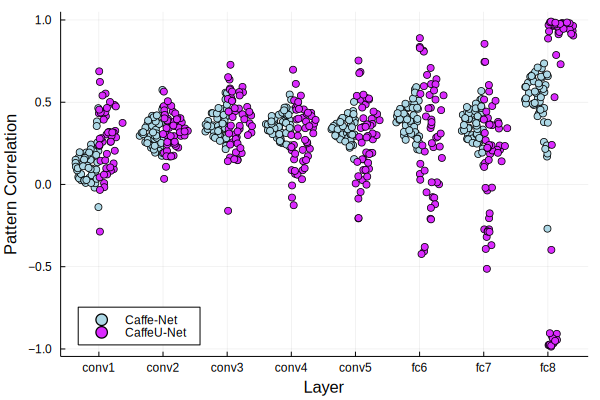

In [8]:
@df df_caffe_with_sub1 dotplot(
    string.(:layer),
    :x,
    side=:left,
    legend= :bottomleft,
    color=palette(:blues),
    label="Caffe-Net",
    xlabel="Layer",
    ylabel="Pattern Correlation",
    fontfamily="helvetica"
)

@df df_unet_with_sub1 dotplot!(
    string.(:layer),
    :x,
    side=:right,
    color=get(colorschemes[:linear_bmw_5_95_c89_n256], 0.57),
    label="CaffeU-Net"
)

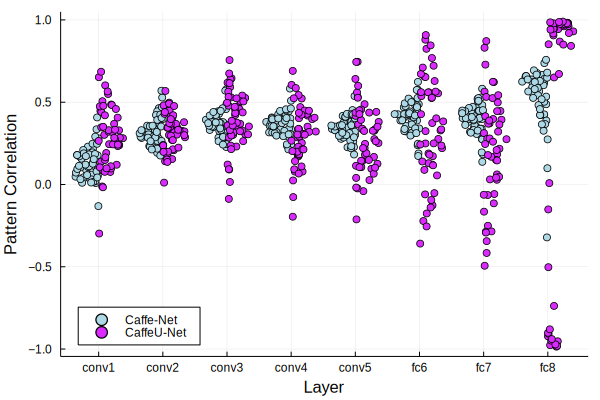

In [9]:
@df df_caffe_with_sub2 dotplot(
    string.(:layer),
    :x,
    side=:left,
    legend= :bottomleft,
    color=palette(:blues),
    label="Caffe-Net",
    xlabel="Layer",
    ylabel="Pattern Correlation",
    fontfamily="helvetica"
)

@df df_unet_with_sub2 dotplot!(
    string.(:layer),
    :x,
    side=:right,
    color=get(colorschemes[:linear_bmw_5_95_c89_n256], 0.57),
    label="CaffeU-Net"
)


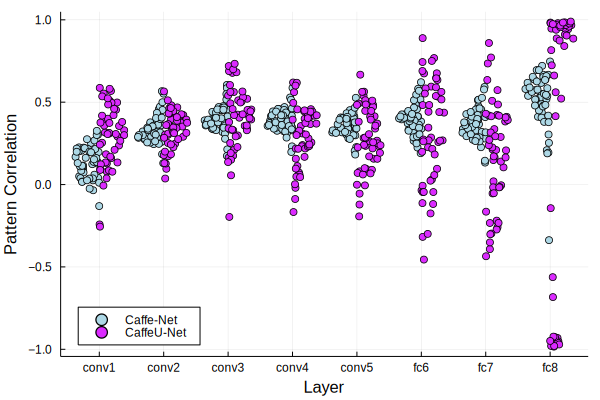

In [10]:
@df df_caffe_with_sub3 dotplot(
    string.(:layer),
    :x,
    side=:left,
    legend= :bottomleft,
    color=palette(:blues),
    label="Caffe-Net",
    xlabel="Layer",
    ylabel="Pattern Correlation",
    fontfamily="helvetica"
)

@df df_unet_with_sub3 dotplot!(
    string.(:layer),
    :x,
    side=:right,
    color=get(colorschemes[:linear_bmw_5_95_c89_n256], 0.57),
    label="CaffeU-Net"
)

In [11]:
data_caffe_without_subject1 = [
    vec(caffe_without_norm[1, 1, :]) ["conv1" for n = 1 : 50];
    vec(caffe_without_norm[1, 2, :]) ["conv2" for n = 1 : 50];
    vec(caffe_without_norm[1, 3, :]) ["conv3" for n = 1 : 50];
    vec(caffe_without_norm[1, 4, :]) ["conv4" for n = 1 : 50];
    vec(caffe_without_norm[1, 5, :]) ["conv5" for n = 1 : 50];
    vec(caffe_without_norm[1, 6, :]) ["fc6" for n = 1 : 50];
    vec(caffe_without_norm[1, 7, :]) ["fc7" for n = 1 : 50];
    vec(caffe_without_norm[1, 8, :]) ["fc8" for n = 1 : 50]
]

data_unet_without_subject1 = [
    vec(unet_without_norm[1, 1, :]) ["conv1" for n = 1 : 50];
    vec(unet_without_norm[1, 2, :]) ["conv2" for n = 1 : 50];
    vec(unet_without_norm[1, 3, :]) ["conv3" for n = 1 : 50];
    vec(unet_without_norm[1, 4, :]) ["conv4" for n = 1 : 50];
    vec(unet_without_norm[1, 5, :]) ["conv5" for n = 1 : 50];
    vec(unet_without_norm[1, 6, :]) ["fc6" for n = 1 : 50];
    vec(unet_without_norm[1, 7, :]) ["fc7" for n = 1 : 50];
    vec(unet_without_norm[1, 8, :]) ["fc8" for n = 1 : 50];
]

data_caffe_without_subject2 = [
    vec(caffe_without_norm[2, 1, :]) ["conv1" for n = 1 : 50];
    vec(caffe_without_norm[2, 2, :]) ["conv2" for n = 1 : 50];
    vec(caffe_without_norm[2, 3, :]) ["conv3" for n = 1 : 50];
    vec(caffe_without_norm[2, 4, :]) ["conv4" for n = 1 : 50];
    vec(caffe_without_norm[2, 5, :]) ["conv5" for n = 1 : 50];
    vec(caffe_without_norm[2, 6, :]) ["fc6" for n = 1 : 50];
    vec(caffe_without_norm[2, 7, :]) ["fc7" for n = 1 : 50];
    vec(caffe_without_norm[2, 8, :]) ["fc8" for n = 1 : 50]
]

data_unet_without_subject2 = [
    vec(unet_without_norm[2, 1, :]) ["conv1" for n = 1 : 50];
    vec(unet_without_norm[2, 2, :]) ["conv2" for n = 1 : 50];
    vec(unet_without_norm[2, 3, :]) ["conv3" for n = 1 : 50];
    vec(unet_without_norm[2, 4, :]) ["conv4" for n = 1 : 50];
    vec(unet_without_norm[2, 5, :]) ["conv5" for n = 1 : 50];
    vec(unet_without_norm[2, 6, :]) ["fc6" for n = 1 : 50];
    vec(unet_without_norm[2, 7, :]) ["fc7" for n = 1 : 50];
    vec(unet_without_norm[2, 8, :]) ["fc8" for n = 1 : 50];
]

data_caffe_without_subject3 = [
    vec(caffe_without_norm[3, 1, :]) ["conv1" for n = 1 : 50];
    vec(caffe_without_norm[3, 2, :]) ["conv2" for n = 1 : 50];
    vec(caffe_without_norm[3, 3, :]) ["conv3" for n = 1 : 50];
    vec(caffe_without_norm[3, 4, :]) ["conv4" for n = 1 : 50];
    vec(caffe_without_norm[3, 5, :]) ["conv5" for n = 1 : 50];
    vec(caffe_without_norm[3, 6, :]) ["fc6" for n = 1 : 50];
    vec(caffe_without_norm[3, 7, :]) ["fc7" for n = 1 : 50];
    vec(caffe_without_norm[3, 8, :]) ["fc8" for n = 1 : 50]
]

data_unet_without_subject3 = [
    vec(unet_without_norm[3, 1, :]) ["conv1" for n = 1 : 50];
    vec(unet_without_norm[3, 2, :]) ["conv2" for n = 1 : 50];
    vec(unet_without_norm[3, 3, :]) ["conv3" for n = 1 : 50];
    vec(unet_without_norm[3, 4, :]) ["conv4" for n = 1 : 50];
    vec(unet_without_norm[3, 5, :]) ["conv5" for n = 1 : 50];
    vec(unet_without_norm[3, 6, :]) ["fc6" for n = 1 : 50];
    vec(unet_without_norm[3, 7, :]) ["fc7" for n = 1 : 50];
    vec(unet_without_norm[3, 8, :]) ["fc8" for n = 1 : 50];
]

df_caffe_without_sub1 = DataFrame(data_caffe_without_subject1, [:x, :layer])
df_unet_without_sub1 = DataFrame(data_unet_without_subject1, [:x, :layer])

df_caffe_without_sub2 = DataFrame(data_caffe_without_subject2, [:x, :layer])
df_unet_without_sub2 = DataFrame(data_unet_without_subject2, [:x, :layer])

df_caffe_without_sub3 = DataFrame(data_caffe_without_subject3, [:x, :layer])
df_unet_without_sub3 = DataFrame(data_unet_without_subject3, [:x, :layer])

,x,layer
,Any,Any
1,0.675772,conv1
2,0.837035,conv1
3,0.640587,conv1
4,0.769241,conv1
5,0.701631,conv1
6,0.637269,conv1
7,0.947939,conv1
8,0.92712,conv1
9,0.790014,conv1


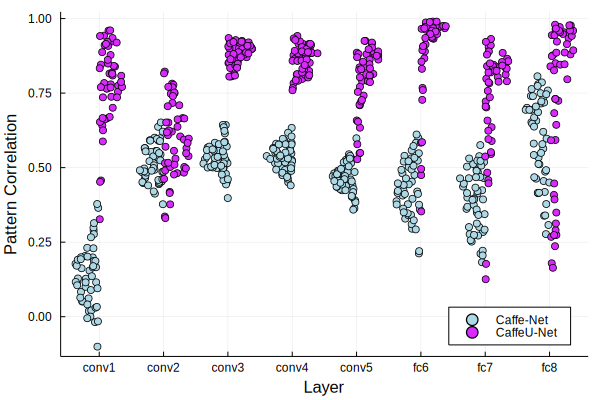

In [12]:
@df df_caffe_without_sub1 dotplot(
    string.(:layer),
    :x,
    side=:left,
    legend= :bottomright,
    color=palette(:blues),
    label="Caffe-Net",
    xlabel="Layer",
    ylabel="Pattern Correlation",
    fontfamily="helvetica"
)

@df df_unet_without_sub1 dotplot!(
    string.(:layer),
    :x,
    side=:right,
    color=get(colorschemes[:linear_bmw_5_95_c89_n256], 0.57),
    label="CaffeU-Net"
)

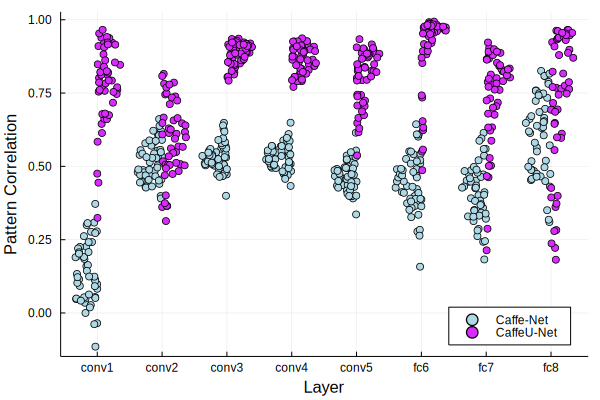

In [13]:
@df df_caffe_without_sub2 dotplot(
    string.(:layer),
    :x,
    side=:left,
    legend= :bottomright,
    color=palette(:blues),
    label="Caffe-Net",
    xlabel="Layer",
    ylabel="Pattern Correlation",
    fontfamily="helvetica"
)

@df df_unet_without_sub2 dotplot!(
    string.(:layer),
    :x,
    side=:right,
    color=get(colorschemes[:linear_bmw_5_95_c89_n256], 0.57),
    label="CaffeU-Net"
)

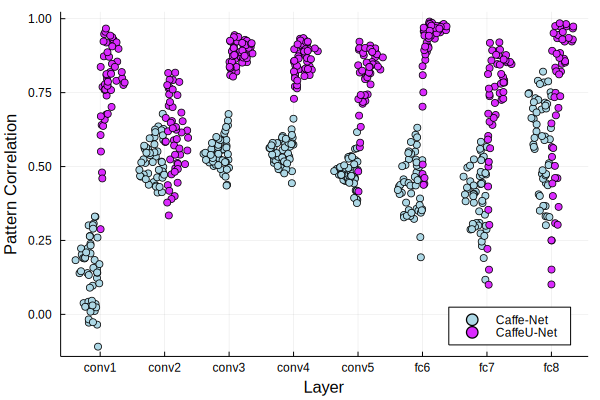

In [14]:
@df df_caffe_without_sub3 dotplot(
    string.(:layer),
    :x,
    side=:left,
    legend= :bottomright,
    color=palette(:blues),
    label="Caffe-Net",
    xlabel="Layer",
    ylabel="Pattern Correlation",
    fontfamily="helvetica"
)

@df df_unet_without_sub3 dotplot!(
    string.(:layer),
    :x,
    side=:right,
    color=get(colorschemes[:linear_bmw_5_95_c89_n256], 0.57),
    label="CaffeU-Net"
)

In [15]:
data_caffe_with_mean = [
    vec(caffe_with_norm_mean[1, :]) ["conv1" for n = 1 : 50];
    vec(caffe_with_norm_mean[2, :]) ["conv2" for n = 1 : 50];
    vec(caffe_with_norm_mean[3, :]) ["conv3" for n = 1 : 50];
    vec(caffe_with_norm_mean[4, :]) ["conv4" for n = 1 : 50];
    vec(caffe_with_norm_mean[5, :]) ["conv5" for n = 1 : 50];
    vec(caffe_with_norm_mean[6, :]) ["fc6" for n = 1 : 50];
    vec(caffe_with_norm_mean[7, :]) ["fc7" for n = 1 : 50];
    vec(caffe_with_norm_mean[8, :]) ["fc8" for n = 1 : 50];
]

data_unet_with_mean = [
    vec(unet_with_norm_mean[1, :]) ["conv1" for n = 1 : 50];
    vec(unet_with_norm_mean[2, :]) ["conv2" for n = 1 : 50];
    vec(unet_with_norm_mean[3, :]) ["conv3" for n = 1 : 50];
    vec(unet_with_norm_mean[4, :]) ["conv4" for n = 1 : 50];
    vec(unet_with_norm_mean[5, :]) ["conv5" for n = 1 : 50];
    vec(unet_with_norm_mean[6, :]) ["fc6" for n = 1 : 50];
    vec(unet_with_norm_mean[7, :]) ["fc7" for n = 1 : 50];
    vec(unet_with_norm_mean[8, :]) ["fc8" for n = 1 : 50];
]

data_caffe_without_mean = [
    vec(caffe_without_norm_mean[1, :]) ["conv1" for n = 1 : 50];
    vec(caffe_without_norm_mean[2, :]) ["conv2" for n = 1 : 50];
    vec(caffe_without_norm_mean[3, :]) ["conv3" for n = 1 : 50];
    vec(caffe_without_norm_mean[4, :]) ["conv4" for n = 1 : 50];
    vec(caffe_without_norm_mean[5, :]) ["conv5" for n = 1 : 50];
    vec(caffe_without_norm_mean[6, :]) ["fc6" for n = 1 : 50];
    vec(caffe_without_norm_mean[7, :]) ["fc7" for n = 1 : 50];
    vec(caffe_without_norm_mean[8, :]) ["fc8" for n = 1 : 50];
]

data_unet_without_mean = [
    vec(unet_without_norm_mean[1, :]) ["conv1" for n = 1 : 50];
    vec(unet_without_norm_mean[2, :]) ["conv2" for n = 1 : 50];
    vec(unet_without_norm_mean[3, :]) ["conv3" for n = 1 : 50];
    vec(unet_without_norm_mean[4, :]) ["conv4" for n = 1 : 50];
    vec(unet_without_norm_mean[5, :]) ["conv5" for n = 1 : 50];
    vec(unet_without_norm_mean[6, :]) ["fc6" for n = 1 : 50];
    vec(unet_without_norm_mean[7, :]) ["fc7" for n = 1 : 50];
    vec(unet_without_norm_mean[8, :]) ["fc8" for n = 1 : 50];
]

df_caffe_with_mean = DataFrame(data_caffe_with_mean, [:x, :layer])
df_unet_with_mean = DataFrame(data_unet_with_mean, [:x, :layer])

df_caffe_without_mean = DataFrame(data_caffe_without_mean, [:x, :layer])
df_unet_without_mean = DataFrame(data_unet_without_mean, [:x, :layer])

,x,layer
,Any,Any
1,0.668801,conv1
2,0.841296,conv1
3,0.651827,conv1
4,0.768432,conv1
5,0.674982,conv1
6,0.64643,conv1
7,0.943137,conv1
8,0.919218,conv1
9,0.785499,conv1


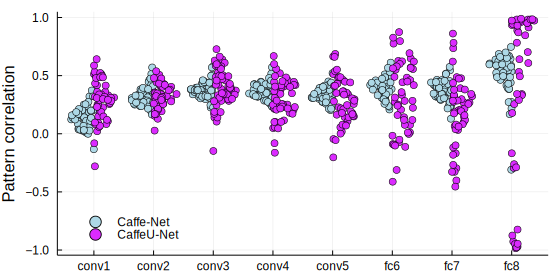

In [17]:
@df df_caffe_with_mean dotplot(
    string.(:layer),
    :x,
    side=:left,
    legend= :bottomleft,
    color=palette(:blues),
    label="Caffe-Net",
    ylabel="Pattern correlation",
    yguidefontsize=11,
    fontfamily="helvetica",
    size=(700*0.8, 400*0.7),
    background_color_legend = nothing,
    foreground_color_legend = nothing
)

@df df_unet_with_mean dotplot!(
    string.(:layer),
    :x,
    side=:right,
    color=get(colorschemes[:linear_bmw_5_95_c89_n256], 0.57),
    label="CaffeU-Net"
)